In [42]:
import matplotlib.pyplot as pl
import networkx as nx
from gtom import gtom
import scipy.sparse as sprs
import numpy as np
import matplotlib.pyplot as plt


In [24]:
# import libraries
import numpy as np
import re
import os
import glob
import pickle
import traceback
from tqdm import tqdm
from ripser import Rips
from persim import PersistenceImager
import geopandas as gpd

In [25]:
svi_data  = gpd.read_file('/Users/h6x/ORNL/git/modeling-ideas/overdose modeling for entire country/data/processed data/svi with hepvu/2018/SVI 2018 with HepVu census tracts/SVI2018_US_census_with_opioid_indicators.shp')

In [26]:
svi_data.head()

,ST,STATE,ST_ABBR,STCNTY,COUNTY,FIPS,LOCATION,AREA_SQMI,E_TOTPOP,M_TOTPOP,...,F_TOTAL,E_UNINSUR,M_UNINSUR,EP_UNINSUR,MP_UNINSUR,E_DAYPOP,Shape_Leng,Shape_Area,NOD_Rate,geometry
0,01,ALABAMA,AL,01015,Calhoun,01015981901,"Census Tract 9819.01, Calhoun County, Alabama",24.243865,0,12,...,-999,0,12,-999.0,-999.0,656,0.339400,0.006105,15.8,"POLYGON ((-86.01323 33.68426, -86.01224 33.687..."
1,01,ALABAMA,AL,01015,Calhoun,01015981902,"Census Tract 9819.02, Calhoun County, Alabama",34.646714,0,12,...,-999,0,12,-999.0,-999.0,146,0.420459,0.008752,15.8,"POLYGON ((-86.01730 33.69662, -86.01704 33.698..."
2,01,ALABAMA,AL,01015,Calhoun,01015981903,"Census Tract 9819.03, Calhoun County, Alabama",13.926276,0,12,...,-999,0,12,-999.0,-999.0,0,0.330164,0.003508,15.8,"POLYGON ((-85.78501 33.66554, -85.78318 33.666..."
3,01,ALABAMA,AL,01097,Mobile,01097003605,"Census Tract 36.05, Mobile County, Alabama",0.732300,899,316,...,-999,33,36,3.7,4.1,5135,0.060725,0.000180,14.8,"POLYGON ((-88.19230 30.69524, -88.19097 30.695..."
4,01,ALABAMA,AL,01097,Mobile,01097990000,"Census Tract 9900, Mobile County, Alabama",0.000000,0,12,...,-999,0,12,-999.0,-999.0,0,0.105380,0.000536,14.8,"MULTIPOLYGON (((-88.05337 30.50699, -88.05109 ..."


In [27]:
VARIABLES_COUNTY = ['STCNTY','EP_POV','EP_UNEMP','EP_PCI','EP_NOHSDP','EP_UNINSUR','EP_AGE65','EP_AGE17','EP_DISABL','EP_SNGPNT','EP_LIMENG','EP_MINRTY','EP_MUNIT','EP_MOBILE','EP_CROWD','EP_NOVEH','EP_GROUPQ']

In [28]:
VARIABLES = ['EP_POV','EP_UNEMP','EP_PCI','EP_NOHSDP','EP_UNINSUR','EP_AGE65','EP_AGE17','EP_DISABL','EP_SNGPNT','EP_LIMENG','EP_MINRTY','EP_MUNIT','EP_MOBILE','EP_CROWD','EP_NOVEH','EP_GROUPQ']

In [29]:
svi_16 = svi_data[VARIABLES_COUNTY]

In [30]:
svi_16.reset_index(drop=True, inplace=True)

In [31]:
svi_16

,STCNTY,EP_POV,EP_UNEMP,EP_PCI,EP_NOHSDP,EP_UNINSUR,EP_AGE65,EP_AGE17,EP_DISABL,EP_SNGPNT,EP_LIMENG,EP_MINRTY,EP_MUNIT,EP_MOBILE,EP_CROWD,EP_NOVEH,EP_GROUPQ
0,01015,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.0,-999.0,0.0,0.0,0.0,0.0,-999.0,0.0,-999.0,0.0
1,01015,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.0,-999.0,0.0,0.0,0.0,0.0,-999.0,0.0,-999.0,0.0
2,01015,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.0,-999.0,0.0,0.0,0.0,0.0,-999.0,0.0,-999.0,0.0
3,01097,-999.0,9.9,2651.0,-999.0,3.7,0.0,2.4,4.7,0.0,0.0,36.7,0.0,-999.0,0.0,-999.0,100.0
4,01097,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.0,-999.0,0.0,0.0,0.0,0.0,-999.0,0.0,-999.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72829,51003,94.3,8.8,4089.0,24.6,2.1,0.0,0.4,3.9,0.0,0.9,36.9,48.0,0.0,38.8,76.5,94.5
72830,51121,17.2,16.4,31675.0,15.5,6.0,35.0,19.4,28.5,7.9,1.7,25.9,37.2,24.2,0.6,22.1,10.8
72831,51700,45.3,18.3,13370.0,26.7,14.9,6.0,22.2,23.6,25.5,0.3,79.5,56.8,0.0,13.9,41.4,33.4
72832,53033,68.8,17.6,4155.0,12.9,5.1,0.3,1.6,4.9,0.0,1.9,56.6,84.3,0.0,11.1,59.8,97.0


In [55]:
COUNTIES = svi_16['STCNTY'].unique().tolist()

In [56]:
len(COUNTIES)

3141

In [69]:
for county in COUNTIES:
    print(county)
    county_data = svi_16[svi_16['STCNTY'] == county]
    print(len(county_data))

    county_data_16 = county_data[VARIABLES]

    # calculate the pearson correlation matrix between the variables
    corr_matrix = county_data_16.corr()

    print(corr_matrix.shape)
    print(corr_matrix)
    # raise each element of the matrix to the power of 12
    corr_matrix_12 = np.power(corr_matrix, 12)


    break

01015
31
(16, 16)
              EP_POV  EP_UNEMP    EP_PCI  EP_NOHSDP  EP_UNINSUR  EP_AGE65  \
EP_POV      1.000000  0.999561  0.745122   0.999396    0.999322  0.998905   
EP_UNEMP    0.999561  1.000000  0.756666   0.999733    0.999902  0.999590   
EP_PCI      0.745122  0.756666  1.000000   0.755552    0.760431  0.768451   
EP_NOHSDP   0.999396  0.999733  0.755552   1.000000    0.999790  0.999548   
EP_UNINSUR  0.999322  0.999902  0.760431   0.999790    1.000000  0.999754   
EP_AGE65    0.998905  0.999590  0.768451   0.999548    0.999754  1.000000   
EP_AGE17    0.823894  0.830199  0.681956   0.829762    0.827878  0.828695   
EP_DISABL   0.999270  0.999733  0.758534   0.999826    0.999756  0.999747   
EP_SNGPNT   0.581867  0.570086  0.118829   0.565378    0.563006  0.553874   
EP_LIMENG   0.142115  0.149559  0.179810   0.150926    0.153047  0.152297   
EP_MINRTY   0.412020  0.397631 -0.042333   0.393754    0.390066  0.385258   
EP_MUNIT    0.219758  0.205448 -0.014788   0.197804    0.2

In [70]:
corr_matrix

,EP_POV,EP_UNEMP,EP_PCI,EP_NOHSDP,EP_UNINSUR,EP_AGE65,EP_AGE17,EP_DISABL,EP_SNGPNT,EP_LIMENG,EP_MINRTY,EP_MUNIT,EP_MOBILE,EP_CROWD,EP_NOVEH,EP_GROUPQ
EP_POV,1.000000,0.999561,0.745122,0.999396,0.999322,0.998905,0.823894,0.999270,0.581867,0.142115,0.412020,0.219758,0.997806,0.295212,0.999715,0.160307
EP_UNEMP,0.999561,1.000000,0.756666,0.999733,0.999902,0.999590,0.830199,0.999733,0.570086,0.149559,0.397631,0.205448,0.998870,0.297458,0.999822,0.142756
EP_PCI,0.745122,0.756666,1.000000,0.755552,0.760431,0.768451,0.681956,0.758534,0.118829,0.179810,-0.042333,-0.014788,0.770403,0.156224,0.754231,-0.176083
EP_NOHSDP,0.999396,0.999733,0.755552,1.000000,0.999790,0.999548,0.829762,0.999826,0.565378,0.150926,0.393754,0.197804,0.999202,0.300959,0.999712,0.137904
EP_UNINSUR,0.999322,0.999902,0.760431,0.999790,1.000000,0.999754,0.827878,0.999756,0.563006,0.153047,0.390066,0.204980,0.999131,0.293339,0.999710,0.140484
EP_AGE65,0.998905,0.999590,0.768451,0.999548,0.999754,1.000000,0.828695,0.999747,0.553874,0.152297,0.385258,0.199215,0.999135,0.292335,0.999529,0.129620
EP_AGE17,0.823894,0.830199,0.681956,0.829762,0.827878,0.828695,1.000000,0.832233,0.493414,0.213810,0.320071,-0.222438,0.833974,0.442442,0.828645,-0.249851
EP_DISABL,0.999270,0.999733,0.758534,0.999826,0.999756,0.999747,0.832233,1.000000,0.562501,0.146020,0.393993,0.194880,0.999146,0.297947,0.999728,0.129363
EP_SNGPNT,0.581867,0.570086,0.118829,0.565378,0.563006,0.553874,0.493414,0.562501,1.000000,-0.021405,0.702906,0.250181,0.542580,0.167803,0.570324,0.390172
EP_LIMENG,0.142115,0.149559,0.179810,0.150926,0.153047,0.152297,0.213810,0.146020,-0.021405,1.000000,0.159923,-0.062254,0.151165,0.030627,0.149398,-0.089339


In [71]:
# in the corrlation matrix make the values zero if they are less than 0.3
corr_matrix[corr_matrix < 0.2] = 0

In [72]:
corr_matrix

,EP_POV,EP_UNEMP,EP_PCI,EP_NOHSDP,EP_UNINSUR,EP_AGE65,EP_AGE17,EP_DISABL,EP_SNGPNT,EP_LIMENG,EP_MINRTY,EP_MUNIT,EP_MOBILE,EP_CROWD,EP_NOVEH,EP_GROUPQ
EP_POV,1.000000,0.999561,0.745122,0.999396,0.999322,0.998905,0.823894,0.999270,0.581867,0.00000,0.412020,0.219758,0.997806,0.295212,0.999715,0.000000
EP_UNEMP,0.999561,1.000000,0.756666,0.999733,0.999902,0.999590,0.830199,0.999733,0.570086,0.00000,0.397631,0.205448,0.998870,0.297458,0.999822,0.000000
EP_PCI,0.745122,0.756666,1.000000,0.755552,0.760431,0.768451,0.681956,0.758534,0.000000,0.00000,0.000000,0.000000,0.770403,0.000000,0.754231,0.000000
EP_NOHSDP,0.999396,0.999733,0.755552,1.000000,0.999790,0.999548,0.829762,0.999826,0.565378,0.00000,0.393754,0.000000,0.999202,0.300959,0.999712,0.000000
EP_UNINSUR,0.999322,0.999902,0.760431,0.999790,1.000000,0.999754,0.827878,0.999756,0.563006,0.00000,0.390066,0.204980,0.999131,0.293339,0.999710,0.000000
EP_AGE65,0.998905,0.999590,0.768451,0.999548,0.999754,1.000000,0.828695,0.999747,0.553874,0.00000,0.385258,0.000000,0.999135,0.292335,0.999529,0.000000
EP_AGE17,0.823894,0.830199,0.681956,0.829762,0.827878,0.828695,1.000000,0.832233,0.493414,0.21381,0.320071,0.000000,0.833974,0.442442,0.828645,0.000000
EP_DISABL,0.999270,0.999733,0.758534,0.999826,0.999756,0.999747,0.832233,1.000000,0.562501,0.00000,0.393993,0.000000,0.999146,0.297947,0.999728,0.000000
EP_SNGPNT,0.581867,0.570086,0.000000,0.565378,0.563006,0.553874,0.493414,0.562501,1.000000,0.00000,0.702906,0.250181,0.542580,0.000000,0.570324,0.390172
EP_LIMENG,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.213810,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [73]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

In [74]:
# Initialize the graph
G = nx.Graph()

# Add nodes with labels from the correlation matrix
for col in corr_matrix.columns:
    G.add_node(col)

In [75]:
# Add edges with weights from the correlation matrix
for i, row in enumerate(corr_matrix.index):
    for j, col in enumerate(corr_matrix.columns):
        if i != j:
            G.add_edge(row, col, weight=corr_matrix.loc[row, col])

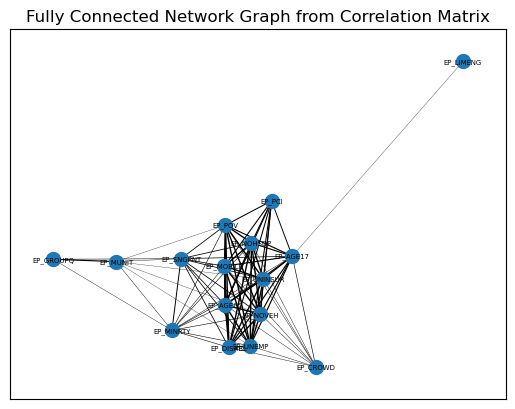

In [76]:
# Set position layout for nodes
pos = nx.spring_layout(G)

# Draw the nodes
nx.draw_networkx_nodes(G, pos, node_size=100)

# Draw the edges
edges = G.edges(data=True)
weights = [edge[2]['weight'] for edge in edges]
nx.draw_networkx_edges(G, pos, edgelist=edges, width=weights)

# Draw the labels
nx.draw_networkx_labels(G, pos, font_size=5, font_family="sans-serif")


# Show the plot
plt.title('Fully Connected Network Graph from Correlation Matrix')
plt.show()

In [77]:
#Define the pair of nodes
node_pair = ('EP_UNEMP','EP_AGE17')

# Extract the subgraph for the pair of nodes
subgraph = G.edge_subgraph([(node_pair[0], node_pair[1]), (node_pair[1], node_pair[0])])


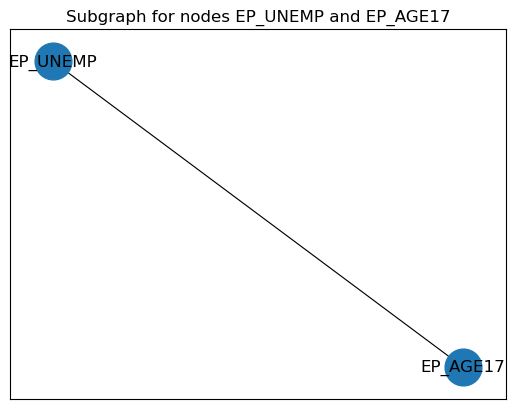

In [78]:
# Position layout
pos = nx.spring_layout(subgraph)

# Draw nodes
nx.draw_networkx_nodes(subgraph, pos, node_size=700)

# Draw edges with weights
edges = subgraph.edges(data=True)
weights = [edge[2]['weight'] for edge in edges]
nx.draw_networkx_edges(subgraph, pos, edgelist=edges, width=weights)

# Draw labels
nx.draw_networkx_labels(subgraph, pos, font_size=12, font_family="sans-serif")

# Show plot
plt.title(f'Subgraph for nodes {node_pair[0]} and {node_pair[1]}')
plt.show()